<a href="https://colab.research.google.com/github/suheylakarakaya/data_science_works/blob/main/movie_recomender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu projede [IMDB Movies Dataset](https://www.kaggle.com/code/shobhitmaurya/series-recommendation/data) kullanılarak bir öneri algoritması yazılması planlandı. Aynı zamanda veri seti üzerinde keşifsel veri analizi gerçekleştirildi. Veri setinin ve verilerin daha anlamlı analizi için veri görselleştirme methodları uygulandı.



**Pandas :** Veri işleme ve analiz için geliştirilmiş sayısal tabloları işlemek için kullanılır.

**Numpy:** Çok boyutlu dizilerle ve matrislerle çalışmanızı sağlayan ve matematiksel işlemleri gerçekleştiren bir kütüphanedir.

**Sys:** Kullandığımız Python sürümü ile ilgili bilgi edinmenizi ve kullandığımız Python sürümü ile çeşitli işlemler yapabilmemizi sağlar.

**Csv:** Csv dosyalarını okuyabilmemizi ve işleyebilmemizi sağlayan kütüphanedir.


In [90]:
import pandas as pd 
import numpy as np
import sys
import csv

In [91]:
#data-setimizi import ediyoruz. kodu çalıştırdıktan sonra cihazınızdan dosyanızı seçerek import edebilirsiniz.
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [92]:
#datasetimizi daha rahat kullanabilmek için df yapısına atıyoruz. (df = dataframe)
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

# **EDA (Exploratory Data Analysis)**

In [93]:
#dataset ile ilgili tüm bilgileri döner. her sütun için ilk 5 ve son 5 satırı döndürür.
df.info

<bound method DataFrame.info of        ID                                        Poster_Link  \
0       1  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1       2  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2       3  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3       4  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4       5  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..    ...                                                ...   
995   996  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996   997  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997   998  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998   999  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  1000  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 mi

In [94]:
#datasetin kaç satır ve sütünden oluştuğunu gösteren bir tupple nesnesi döndürür. İlk veri satır sayısını, ikinci veri sütun sayısını verir.
print("data", df.shape)

data (1000, 17)


In [95]:
#datasetinde bulunan sütunların isimlerini döndürür.
df.columns

Index(['ID', 'Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [96]:
#Series_Title sütunundaki verileri döndürür. Eğer aynı veriden 2 kez tekrarlanmışsa sadece 1 kez yazdırır. 
#Bu işlemi unique fonksiyonu yapar.
df.Series_Title.unique()

array(['The Shawshank Redemption', 'The Godfather', 'The Dark Knight',
       'The Godfather: Part II', '12 Angry Men',
       'The Lord of the Rings: The Return of the King', 'Pulp Fiction',
       "Schindler's List", 'Inception', 'Fight Club',
       'The Lord of the Rings: The Fellowship of the Ring',
       'Forrest Gump', 'Il buono, il brutto, il cattivo',
       'The Lord of the Rings: The Two Towers', 'The Matrix',
       'Goodfellas', 'Star Wars: Episode V - The Empire Strikes Back',
       "One Flew Over the Cuckoo's Nest", 'Hamilton', 'Gisaengchung',
       'Soorarai Pottru', 'Interstellar', 'Cidade de Deus',
       'Sen to Chihiro no kamikakushi', 'Saving Private Ryan',
       'The Green Mile', 'La vita è bella', 'Se7en',
       'The Silence of the Lambs', 'Star Wars', 'Seppuku',
       'Shichinin no samurai', "It's a Wonderful Life", 'Joker',
       'Whiplash', 'The Intouchables', 'The Prestige', 'The Departed',
       'The Pianist', 'Gladiator', 'American History X',
     

In [97]:
#datasetteki Genre sütununda bulunan verileri döndürür. unique fonksiyonu ile duplicate verileri elimine eder.
df.Genre.unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [98]:
#Genre sütununda bulunan her eşsiz kaydın toplam sayını verir.
df['Genre'].value_counts().unique()

array([85, 37, 35, 31, 30, 28, 27, 26, 24, 21, 16, 15, 14, 13, 12, 11, 10,
        9,  8,  7,  6,  5,  4,  3,  2,  1])

In [99]:
#Genre sütunundaki verilerimizin detaylarını döndürür.
df["Genre"].describe()

count      1000
unique      202
top       Drama
freq         85
Name: Genre, dtype: object

In [100]:
#Director sütunundaki verilerimizin detaylarını döndürür.
df["Director"].describe()

count                 1000
unique                 548
top       Alfred Hitchcock
freq                    14
Name: Director, dtype: object

In [101]:
#sütunlar ile ilgili sayısal açıklamaları döndürür.
df.describe(include=['O'])

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


In [102]:
#Director sütunundaki verilere göre alfabetik sıralama yapar.
df.sort_values(by='Director', ascending=True)

,ID,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
65,66,https://m.media-amazon.com/images/M/MV5BMDhjZW...,Taare Zameen Par,2007,U,165 min,"Drama, Family",8.4,An eight-year-old boy is thought to be a lazy ...,NaN,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,"1,223,869"
612,613,https://m.media-amazon.com/images/M/MV5BYjYzOG...,The Trial of the Chicago 7,2020,R,129 min,"Drama, History, Thriller",7.8,The story of 7 people on trial stemming from v...,77.0,Aaron Sorkin,Eddie Redmayne,Alex Sharp,Sacha Baron Cohen,Jeremy Strong,89896,NaN
734,735,https://m.media-amazon.com/images/M/MV5BMTQ5NT...,La vie d'Adèle,2013,A,180 min,"Drama, Romance",7.7,"Adèle's life is changed when she meets Emma, a...",89.0,Abdellatif Kechiche,Léa Seydoux,Adèle Exarchopoulos,Salim Kechiouche,Aurélien Recoing,138741,"2,199,675"
577,578,https://m.media-amazon.com/images/M/MV5BY2YxNj...,Udta Punjab,2016,A,148 min,"Action, Crime, Drama",7.8,A story that revolves around drug abuse in the...,NaN,Abhishek Chaubey,Shahid Kapoor,Alia Bhatt,Kareena Kapoor,Diljit Dosanjh,27175,NaN
735,736,https://m.media-amazon.com/images/M/MV5BMTgwNT...,Kai po che!,2013,U,130 min,"Drama, Sport",7.7,Three friends growing up in India at the turn ...,40.0,Abhishek Kapoor,Amit Sadh,Sushant Singh Rajput,Rajkummar Rao,Amrita Puri,32628,"1,122,527"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,139,https://m.media-amazon.com/images/M/MV5BMTgwNz...,Mandariinid,2013,NaN,87 min,"Drama, War",8.2,"In 1992, war rages in Abkhazia, a breakaway re...",73.0,Zaza Urushadze,Lembit Ulfsak,Elmo Nüganen,Giorgi Nakashidze,Misha Meskhi,40382,"144,501"
334,335,https://m.media-amazon.com/images/M/MV5BZDkzMT...,Gully Boy,2019,UA,154 min,"Drama, Music, Romance",8.0,A coming-of-age story based on the lives of st...,65.0,Zoya Akhtar,Vijay Varma,Nakul Roshan Sahdev,Ranveer Singh,Vijay Raaz,31886,"5,566,534"
221,222,https://m.media-amazon.com/images/M/MV5BZGFmMj...,Zindagi Na Milegi Dobara,2011,U,155 min,"Comedy, Drama",8.1,Three friends decide to turn their fantasy vac...,NaN,Zoya Akhtar,Hrithik Roshan,Farhan Akhtar,Abhay Deol,Katrina Kaif,67927,"3,108,485"
92,93,https://m.media-amazon.com/images/M/MV5BNjAzMz...,Babam ve Oglum,2005,NaN,112 min,"Drama, Family",8.3,The family of a left-wing journalist is torn a...,NaN,Çagan Irmak,Çetin Tekindor,Fikret Kuskan,Hümeyra,Ege Tanman,78925,NaN


In [103]:
#datasetteki ilk 3 satır ile ilgili tüm bilgileri döndürür.
df.head(3)

,ID,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,2,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,3,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [104]:
#datasetteki son 3 satır ile ilgili tüm bilgileri döndürür.
df.tail(3)

,ID,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
997,998,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,999,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,1000,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [105]:
#eğer sadece bir sütun bazında verileri görmek istersek aşağıdaki yapıyı kullanabiliriz. kodumuz 'overview' sütunu için ilk 3 satırın verisini döndürür.
df["Overview"].head(3)

0    Two imprisoned men bond over a number of years...
1    An organized crime dynasty's aging patriarch t...
2    When the menace known as the Joker wreaks havo...
Name: Overview, dtype: object

# **Content-Based Recommendation System**


Buradan itibaren İçerik Tabanlı Öneri Sistemimizi oluşturacağız. 

In [106]:
#Overview içerisinde boş değer olup olmadığını sorguluyoruz. True dönerse var, False dönerse boş verimiz olmadığı anlamına gelir.
df.Overview.isnull().any()

False

In [107]:
#benim Overview sütunumda hiç boş değer yoktu. Fakat sizin kodunuz True dönerse kaç satırın boş olduğunu bu kod yardımı ile görebilirsiniz.
df.Overview.isnull().sum()

0

In [108]:
#kullandığımız datasetin dili ingilizce olduğu için en çok kullanılan ve hesaplamımıza girmesini istemediğimiz "a", "an", "the" 
#gibi kelimeleri işlem dışı bırakacağız. bu işlemler için gerekli olan "nltk" kütüphanesini import ediyoruz. paket kurulumları gerçekleşiyor.
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
#projemizde kullanacağımız TF-IDF methodu için gerekli kod yapısıdır. TF-IDF yardımı ile hesaplamaya girmesini istemediğimiz ve
#çok sık tekrar eden kelimeleri tespit edip algoritma dışında tutuyoruz.
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [110]:
#bahsedilen TF_IDF işlemi Overview sutünuna uygulanıyor ve istatiksel veriyi görüntülemek için matrix değişkenine atanıyor.
matrix = tfv.fit_transform(df['Overview'])

In [111]:
matrix.shape

(1000, 1319)

In [112]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(matrix, matrix)

In [113]:
sig[0]

array([0.76191238, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76162352, 0.76163481, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76161941, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76164548, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.7616092 , 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76161397, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76168369, 0.76159416,
       0.76159416, 0.76161296, 0.76159416, 0.76159416, 0.76159

In [114]:
#Series_Title sütununda duplicate eden veri varsa drop fonksiyonu ile duplica olan veriyi siliyoruz. ve sonucu indices değişkenine atıyoruz.
indices = pd.Series(df.index, index=df['Series_Title']).drop_duplicates()

In [115]:
indices

Series_Title
The Shawshank Redemption      0
The Godfather                 1
The Dark Knight               2
The Godfather: Part II        3
12 Angry Men                  4
                           ... 
Breakfast at Tiffany's      995
Giant                       996
From Here to Eternity       997
Lifeboat                    998
The 39 Steps                999
Length: 1000, dtype: int64

In [116]:
#"lifebot filminin" indisini döndürür.
indices["Lifeboat"]

998

In [117]:
#kontrol amaçlı Series Title sütunun son 3 satırını döndürüp "Lifeboat" filminin kaçıncı satırda olduğunu görüntüleyebiliriz.
df["Series_Title"].tail(3)

997    From Here to Eternity
998                 Lifeboat
999             The 39 Steps
Name: Series_Title, dtype: object

In [ ]:
sig[998]

In [120]:
sig[indices['Lifeboat']]

array([0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76160521, 0.76159416, 0.76169147, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76160398, 0.76159416, 0.76159416, 0.76160287, 0.76161015,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76160159,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76168593, 0.76159416,
       0.76159416, 0.76162094, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76168458, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76160595,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76160353,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.7616034 ,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76160898, 0.76159416, 0.76161076, 0.76159416, 0.76161

In [121]:
#enumerate fonksiyonu her veriyi alt alta yazdırmamızı sağlar.
list(enumerate(sig[indices['Lifeboat']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7616052108643397),
 (6, 0.7615941559557649),
 (7, 0.7616914663039961),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7616039781070354),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7616028712800128),
 (24, 0.761610151386614),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7616015904982203),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.7615

In [122]:
#yukarıda yapılan benzerlik hesaplamalarına göre sonucumuzu döndürmek için gerekli parametreleri aşağıdaki kod yapısına uyarlıyoruz. 
def give_rec(title, sig=sig):
    id = indices[title]
    scores = list(enumerate(sig[id]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:11]
    series_indices = [i[0] for i in scores]
    return pd.DataFrame({"title":df['Series_Title'].iloc[series_indices],"scores":scores})

In [123]:
#artık istediğimiz film ismini yazarak içerik benzerliğine göre bize tavsiye edilen ilk 10 filmi görüntüleyebiliriz.
give_rec('The Muppet Movie')

,title,scores
559,Notorious,"(559, 0.7616822929814347)"
565,A Night at the Opera,"(565, 0.7616754411090523)"
879,Once Upon a Time... in Hollywood,"(879, 0.7616680096914232)"
293,What Ever Happened to Baby Jane?,"(293, 0.7616674756300441)"
507,Ying xiong,"(507, 0.7616599395542164)"
583,Captain America: Civil War,"(583, 0.7616567072679901)"
75,Alien,"(75, 0.7616544622452047)"
267,Stand by Me,"(267, 0.7616525896376096)"
763,This Is England,"(763, 0.7616512627289374)"
221,Zindagi Na Milegi Dobara,"(221, 0.7616499613885473)"


# **DATA VISULATION**



Bu kısımda bazı verilerimizi görselleştirerek daha kolay analiz edeceğiz. Analiz ederken de görselleştirme kodlarını öğreneceğiz.

Öncelikle veri görselleştirmede en çok kullanılarn Python kütüphanelerinden **Matplolib** ve **Seaborn** u import ediyoruz.

In [124]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [125]:
#öncelikle kestane balının diyarı Zonguldak'dan herkese selamlar :)) burada Genre sütunun ilk 10 satırını görüntülüyoruz.
df["Genre"].head(10)

0                        Drama
1                 Crime, Drama
2         Action, Crime, Drama
3                 Crime, Drama
4                 Crime, Drama
5     Action, Adventure, Drama
6                 Crime, Drama
7    Biography, Drama, History
8    Action, Adventure, Sci-Fi
9                        Drama
Name: Genre, dtype: object

In [126]:
#türleri ',' virgül işaretine göre ayırıp(split) sıralı olarak indis ataması yapıyoruz.
genres=[]
for Genre in df.Genre:
  x=Genre.split(',')
  for i in x:
    if i not in genres:
      genres.append(str(i))
genres=str(genres) 

#sırasıyla film isimlerini döngü ile dönerek farklı bir listeye atıyoruz.
movie_title=[]
for Series_Title in df.Series_Title:
  movie_title.append(Series_Title)
movie_title=str(movie_title)  

In [127]:
#wordcloud fonksiyonu parametre olarak görselleştirme özelliklerini alıyor. biz gereklı parametreleri girip istediğimiz liste ile generate ediyoruz.
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2).generate(movie_title)

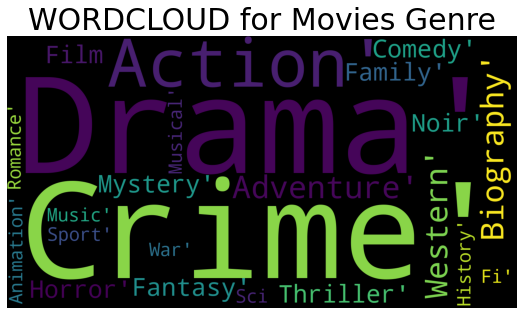

In [128]:
#oluşturacağımız grafiğin boyutlarını ve başlığını belirleyip. döndürüyoruz.
plt.figure(figsize=(20,5))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

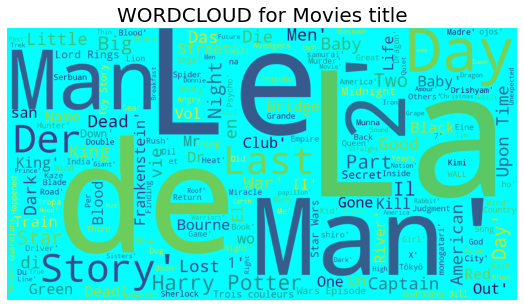

In [129]:
#oluşturacağımız grafiğin boyutlarını ve başlığını belirleyip. döndürüyoruz.
plt.figure(figsize=(20,5))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=20)
plt.imshow(wordcloud_title)

In [130]:
#Series Title ve IMDB Rating sütunlarını gruplayarak rating oranı en fazla olan filmleri sırası ile döndürüyoruz. head() komutunu sayı belirtmeden yazarsak bize her zaman ilk 5 veriyi döner.
df1=df.groupby(['Series_Title'])[['IMDB_Rating']].sum()
high_rated=df1.nlargest(20,'IMDB_Rating')
high_rated.head()

,IMDB_Rating
Series_Title,
Drishyam,16.5
The Shawshank Redemption,9.3
The Godfather,9.2
12 Angry Men,9.0
The Dark Knight,9.0


<BarContainer object of 20 artists>

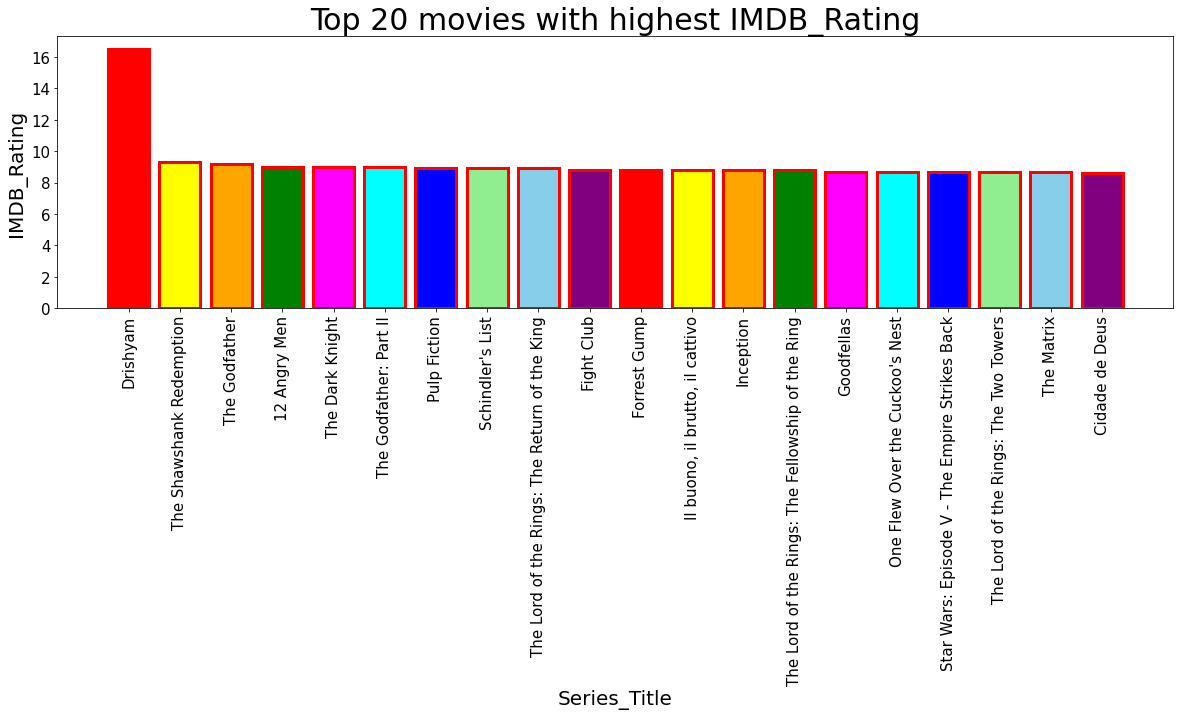

In [131]:
#Bu plotta gerekli parametleri belirleyerek IMDB ratingi en fazla olan ilk 20 filmi görselleştiriyoruz.
plt.figure(figsize=(20,5))
plt.title('Top 20 movies with highest IMDB_Rating',fontsize=30)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('IMDB_Rating',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Series_Title',fontsize=20)
plt.yticks(fontsize=15)
plt.bar(high_rated.index,high_rated['IMDB_Rating'],linewidth=3,edgecolor='red',color=colors)